<a href="https://colab.research.google.com/github/jdvelasq/datalabs/blob/master/labs/analisis_de_sentimientos_en_amazon_usando_bayes.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB: Predicción de la evolución de la diabetes en pacientes usando regresión lineal
===

Los modelos de regresión son ampliamente usados para la construcción de modelos de pronóstico para toma de decisiones. En este caso particular, el médico desearía tener un pronóstico del progreso de la diabetes con un horizonte de doce meses de sus pacientes con base en variables físicas y pruebas de laboratorio, con el fin de realizar mejores tratamientos. Véase https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

En este problema se tiene una base de datos de diez variables base (edad, sexo, índice de masa corporal, presión arterial, y seis variables medidas en sangre) para 442 pacientes, y un índice que mide el progreso de la diabetes un año después de la prueba. Se desea construir un modelo de regresión que permita pronosticar la evolución de la enfermedad con la información disponible.

El archivo que se encuentra disponible en el link

https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/diabetes.csv

In [1]:
#
# Cargue el archivo usando Pandas e imprima la cantidad de
# registros
#
# Rta/
# 442
#


442

In [4]:
#
# Imprima los nombres y tipos de las columnas
# 
# Rta/
#
df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
Y      float64
dtype: object

In [5]:
#
# Imprima los estadísticos descriptivos básicos del dataframe
#
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.269723e-16,-8.016463e-16,1.288562e-16,-8.992304e-17,1.296097e-16,-4.563971e-16,3.875733e-16,-3.845592e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


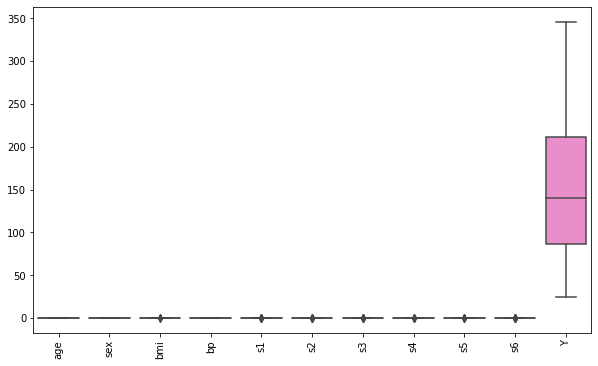

In [3]:
#
# Haga un diagrama de caja y bigotes para visualizar la variación de
# cada variable
# 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [10]:
#
# Use los primeros 300 datos para obtener el mejor modelo
# y los 142 datos restantes para evaluar su desempeño por 
# fuera de la muestra.
#
# Compute la matriz de correlación entre las variables
# para el conjunto de entrenamiento
#
df_train = df[:300]
df_test = df[300:]

df_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.180858,0.190507,0.327352,0.284399,0.239566,-0.024279,0.167719,0.249085,0.280366,0.157366
sex,0.180858,1.000000,0.141694,0.245928,0.046596,0.172645,-0.391606,0.360576,0.136271,0.260489,0.041366
bmi,0.190507,0.141694,1.000000,0.408966,0.283025,0.310578,-0.372582,0.459990,0.464707,0.386719,0.584725
bp,0.327352,0.245928,0.408966,1.000000,0.287456,0.227323,-0.160707,0.282228,0.428315,0.396486,0.427870
s1,0.284399,0.046596,0.283025,0.287456,1.000000,0.898478,0.087308,0.513327,0.483665,0.324762,0.204173
s2,0.239566,0.172645,0.310578,0.227323,0.898478,1.000000,-0.199617,0.675018,0.318852,0.314789,0.172106
s3,-0.024279,-0.391606,-0.372582,-0.160707,0.087308,-0.199617,1.000000,-0.739508,-0.382183,-0.298930,-0.375674
s4,0.167719,0.360576,0.459990,0.282228,0.513327,0.675018,-0.739508,1.000000,0.588311,0.455131,0.425952
s5,0.249085,0.136271,0.464707,0.428315,0.483665,0.318852,-0.382183,0.588311,1.000000,0.467641,0.580156
s6,0.280366,0.260489,0.386719,0.396486,0.324762,0.314789,-0.298930,0.455131,0.467641,1.000000,0.389860


In [ ]:
#
# Grafique la matriz de correlaciones como un heatmap para 
# mejorar la visualización
# (Ayuda: use seaborn)
#


In [12]:
#
# Establezca un modelo base que use todas la variables con los datos 
# en bruto (sin ningun tipo de transformación). Imprima los 
# coeficientes y el intercepto obtenido
#
from sklearn import linear_model


regr = linear_model.LinearRegression()

# Obtiene las variables independientes
X_train = df_train.copy()
X_train.pop('Y')
y_train_true = df_train.Y

regr.fit(X_train.values, y_train_true)

regr.coef_, regr.intercept_

(array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
        -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
         632.95050374,  114.21638941]),
 152.34786451820108)

In [14]:
#
# Compute el pronostico para la muestra de prueba y el error
# cuadratico medio para las muestras de entrenamiento y prueba.
# Estas son las métricas de error del modelo base.
#
from sklearn.metrics import mean_squared_error

y_train_pred = regr.predict(X_train.values)

X_test = df_test.copy()
X_test.pop('Y')
y_test_true = df_test.Y

y_test_pred = regr.predict(X_test.values)

mean_squared_error(y_train_true, y_train_pred), mean_squared_error(y_test_true, y_test_pred)

(2923.0002005013744, 2794.569014500733)

Para este problema usted debe construir un modelo de regresión. Tenga en cuenta lo siguiente:

* Realice el análisis exploratorio de datos.

* Podría ser apropiado aplicar alguna transformación a las variables (tanto la dependiente como las independientes) en el modelo (logaritmo natural, logaritmo base 10, Box-Cox, ...). En el trabajo original se sugiere considerar las variables numéricas al cuadrado.

* Deben investigarse las interacciones entre las variables.

* No todas las variables podrían ser explicativas.


In [ ]:
##
## Preparacion
##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/diabetes.csv",
    sep = ',',           
    thousands = None,    
    decimal = '.',       
    encoding='latin-1') 

df.info()

In [ ]:
df.columns

El archivo que se encuentra disponible en el link

https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/amazon_cells_labelled.tsv

contiene mensajes escritos por los usuarios para productos comprados en Amazon y su valoración (positiva, negativa e indeterminada). En este laboratorio se debe construir un clasificador bayesiano que debe ser entrenado con los mensajes valorados, el cual debe ser posteriormente utilizado para valorar los mensajes con valoración indeterminada.

In [ ]:
#
# Cargue el archivo usando Pandas e imprima la cantidad de
# registros
#
# Rta/
# 14609
#


In [ ]:
#
# Imprima el primer mensaje de texto
#
# Rta/
# 'I try not to adjust the volume setting to avoid that I turn off the call button which is situated just below the volume adjustment knob.'
#


In [ ]:
#
# Imprima la cantidad de mensajes con NaN
#
# Rta/
# 13609
#


In [ ]:
#
# Imprima la cantidad de mensajes con valoración igual a 1.0
#
# Rta/
# 500
#


In [ ]:
#
# Imprima la cantidad de mensajes con valoración igual a 0.0
#
# Rta/
# 500
#


In [ ]:
#
# Genere un nuevo dataset que contenga únicamente los registros
# con valoración positiva o negativa e imprima su longitud
#
# Rta/
# 1000
#


In [ ]:
#
# Genere una nueva columna en el nuevo dataset computada como
# el resultado de aplicar el stemmer de Porter al mensaje e
# imprima el primer mensaje transformado
#
# Rta/
# 'So there is no way for me to plug it in here in the US unless I go by a converter.'
#


In [ ]:
#
# Construya la matriz de terminos del documento considerando
# las palabras que tengan una frecuencia entre el 0.1% y el 98%,
# y que esten unicamente conformadas por letras.
#
# Imprima el tamaño del vocabulario.
#
# Rta/
# 1497
#


In [ ]:
#
# Construya un clasificador bayesiano que use los primeros
# 500 patrones para entrenamiento y los últimos 500 para
# prueba, e imprima el porcentaje de datos para cada clase
# para la muestra de entrenamiento-
#
# Rta/
# 1.0    52.2
# 0.0    47.8
# Name: value, dtype: float64
#


In [ ]:
#
# Imprima el porcentaje de datos para cada clase para la muestra
# de prueba
#
# Rta/
# 0.0    52.2
# 1.0    47.8
# Name: value, dtype: float64
#


In [ ]:
#
# Cree un clasificador de Bayes y entrenelo. Realice el pronostico
# para la muestra de entrenamiento y compute la matriz de confusion
#
# Rta/
# array([[214,  25],
#        [  1, 260]])
#


In [ ]:
#
# Realice el pronóstico para la muestra de entrenamiento y compute
# la matriz de confusión
#
# Rta/
# array([[153, 108],
#        [ 29, 210]])
#


In [ ]:
#
# Realice el pronostico para los mensajes con valoración 
# indeterminada y compute la cantidad de mensajes positivos
#
# Rta/
# 8233
#
